# House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Our objective here is predict sales prices for a collection of houses in Ames, Iowa. Hence, we need to find which features of this homes incluences more in the final price in order to build a supervised regression model.

## 1. Import libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [133]:
sns.set_context('notebook')
sns.set_style('darkgrid')

In [134]:
import warnings
warnings.filterwarnings('ignore')

## 2. Load the Data

In [135]:
!ls data/

data_description.txt  sample_submission.csv  test.csv  train.csv


In [136]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

In [137]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. Explore the data

In [138]:
train.columns, len(train.columns)

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

Dataset has 80 features.

* **Target**: SalePrice

* **Categorical**: 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle' 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',  'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'
    
* **Numerical**: 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold'

In [139]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
               'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
               'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',
               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
               'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
               'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

numerical = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
             'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces',
             'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'WoodDeckSF',
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold']

In [140]:
def missing_values(df):
    """ This function takes a DataFrame(df) as input and returns two columns, 
    total missing values and total missing values percentage """
    
    nan = df.isna().sum()
    total = nan[nan != 0].sort_values(ascending=False)
    percent = round(total/train.shape[0]*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

* Missing Values on categorical attributes

In [141]:
missing_values(train[categorical])

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
GarageCond,81,5.55
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55
BsmtFinType2,38,2.60


Missing values in some categorical attributes represents the absence of the feature in that house. E.g.: NaN in GarageQual column means that there is no garage in that home.

* Missing values on numerical variables

In [142]:
missing_values(train[numerical])

,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


### Target variable: SalePrice

In [143]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

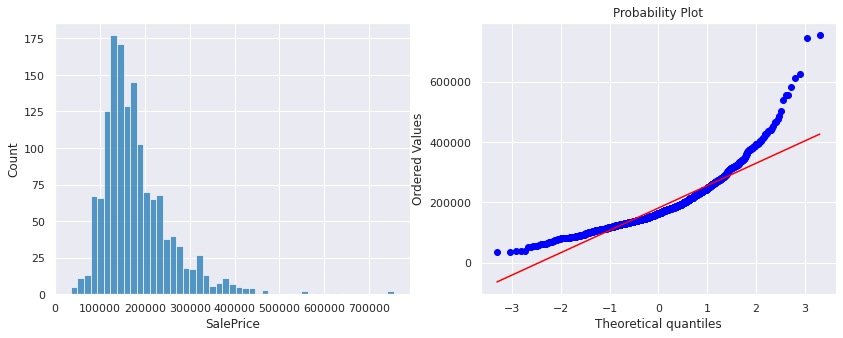

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(train['SalePrice'], ax=ax[0]);
stats.probplot(train['SalePrice'], plot=ax[1]);

* Skewed distribution, we need to transform it using log for the model

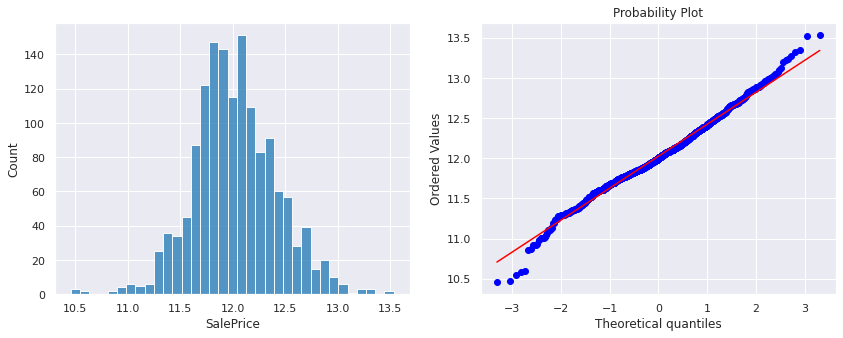

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(np.log1p(train['SalePrice']), ax=ax[0]);
stats.probplot(np.log1p(train['SalePrice']), plot=ax[1]);

* Now it aproximates better to a normal distribution

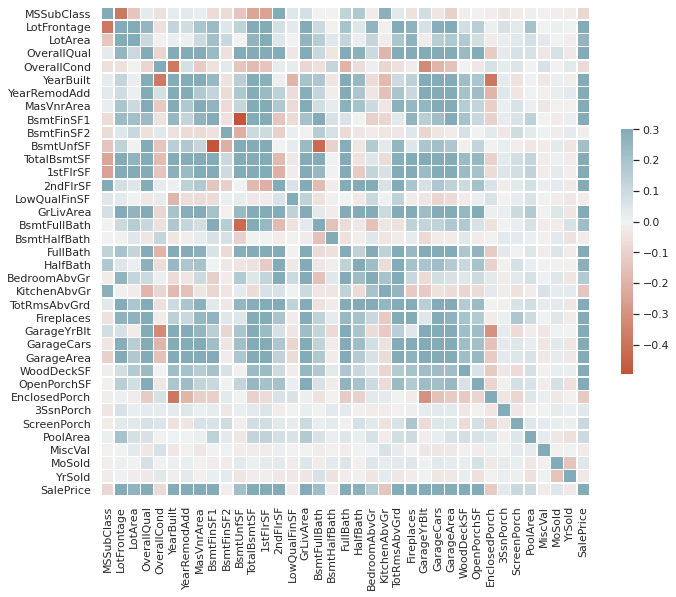

In [146]:
corr = train.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
cmap = sns.diverging_palette(20, 220, n=200)
f, ax = plt.subplots(figsize=(11, 9));
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [147]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Let's take a look at the variables that most correlate with SalePrice

* **OverallQual**: Rates the overall material and finish of the house

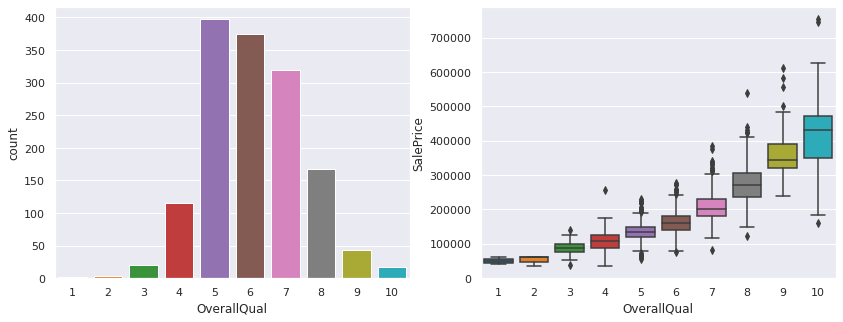

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='OverallQual', data=train, ax=ax[0]);
sns.boxplot(x='OverallQual', y='SalePrice', data=train, ax=ax[1]);

* **GrLivArea**: Above grade (ground) living area square feet

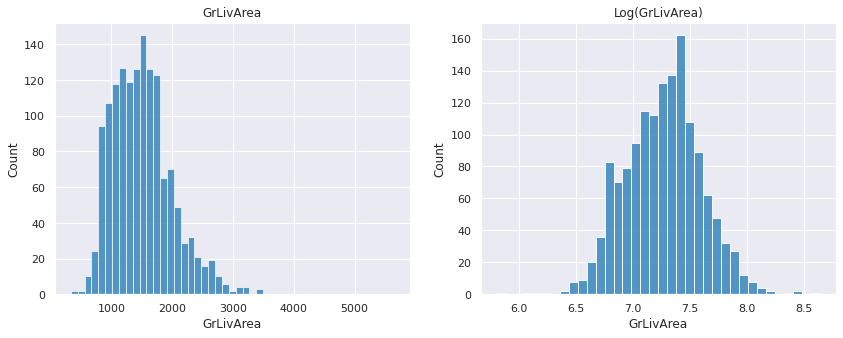

In [149]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(train['GrLivArea'], ax=ax[0]);
sns.histplot(np.log(train['GrLivArea']), ax=ax[1]);
ax[0].set_title('GrLivArea');
ax[1].set_title('Log(GrLivArea)');

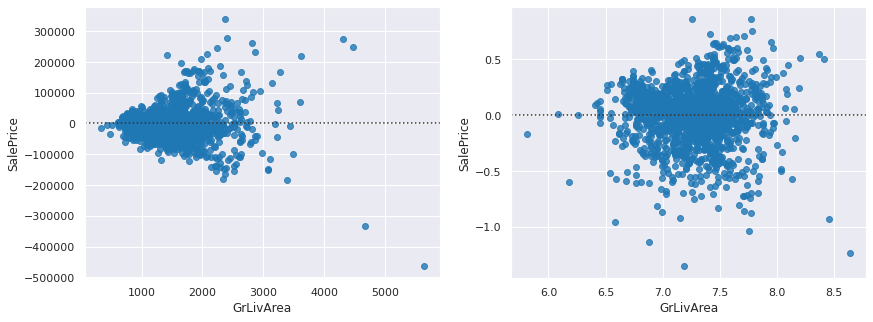

In [150]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.residplot(x='GrLivArea', y='SalePrice', data=train, ax=ax[0]);
sns.residplot(x=np.log1p(train['GrLivArea']), y=np.log1p(train['SalePrice']), ax=ax[1]);

* We can deal with the heterocedasticity using log transformation

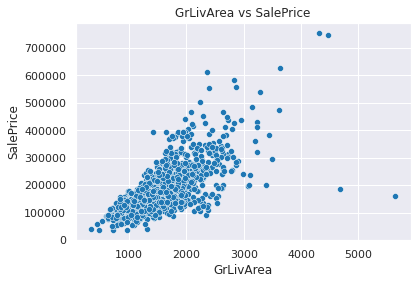

In [151]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train);
plt.title('GrLivArea vs SalePrice');

* There is a strong correlation between 'GrLivArea' and 'SalePrice'.
* There are some outliers

In [152]:
train.corr()['GrLivArea'].sort_values(ascending=False).head(10)

GrLivArea       1.000000
TotRmsAbvGrd    0.825489
SalePrice       0.708624
2ndFlrSF        0.687501
FullBath        0.630012
OverallQual     0.593007
1stFlrSF        0.566024
BedroomAbvGr    0.521270
GarageArea      0.468997
GarageCars      0.467247
Name: GrLivArea, dtype: float64

* **GarageCars** and **GarageArea**

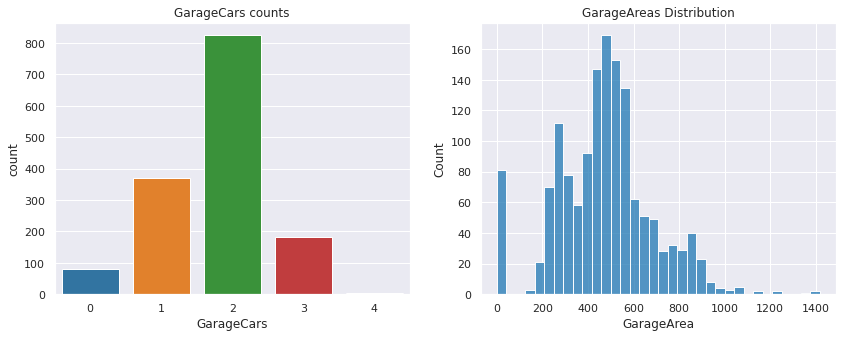

In [153]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(train['GarageCars'], ax=ax[0]);
sns.histplot(train['GarageArea'], ax=ax[1]);
ax[0].set_title('GarageCars counts');
ax[1].set_title('GarageAreas Distribution');

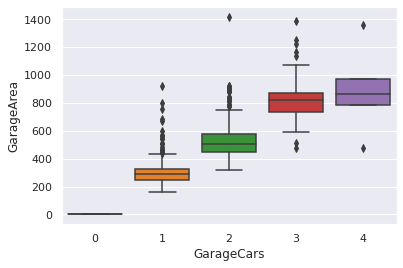

In [154]:
sns.boxplot(x='GarageCars', y='GarageArea', data=train);

* As expected, GarageCars and GarageArea are correlated.

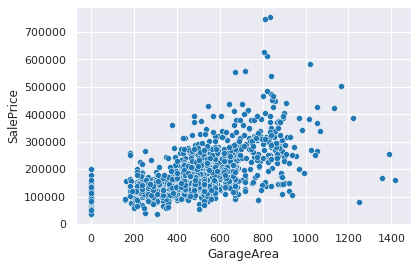

In [155]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=train);

* **TotalBsmtSF**:

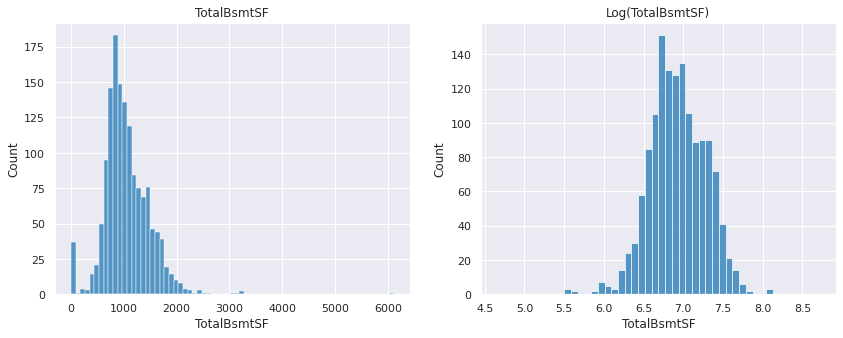

In [156]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(train['TotalBsmtSF'], ax=ax[0]);
totalbsmtsf_with_no_nan = train[train['TotalBsmtSF'] != 0]['TotalBsmtSF']
sns.histplot(np.log(totalbsmtsf_with_no_nan), ax=ax[1]);
ax[0].set_title('TotalBsmtSF');
ax[1].set_title('Log(TotalBsmtSF)');

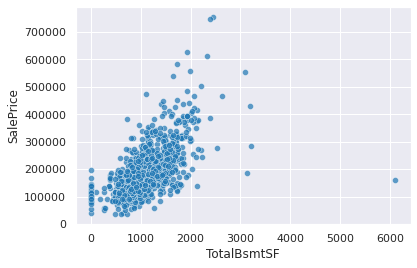

In [157]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train, alpha=0.7);

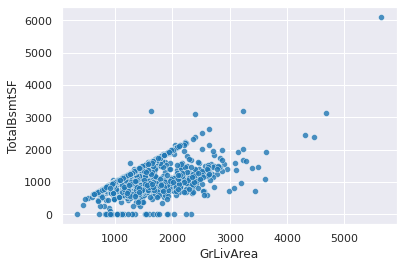

In [158]:
sns.scatterplot(x='GrLivArea', y='TotalBsmtSF', data=train, alpha=0.8);

* There are many house that has the same ground living area and basement area

* YearBuilt and YearRemodAdd

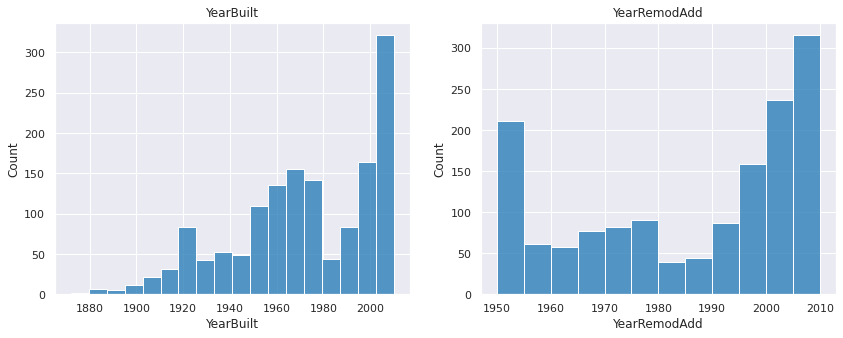

In [159]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(train['YearBuilt'], ax=ax[0]);
sns.histplot(train['YearRemodAdd'], ax=ax[1]);
ax[0].set_title('YearBuilt');
ax[1].set_title('YearRemodAdd');

* Posible new feature from YearBuilt is house age in years

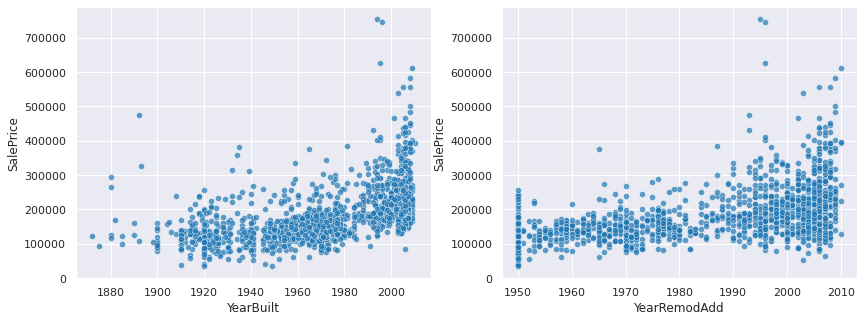

In [160]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train, ax=ax[0], alpha=0.7);
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=train, ax=ax[1], alpha=0.7);

## 4. Prepare the data

In [161]:
# First, lets make a copy of the raw data
train_raw = train.copy()
test_raw = test.copy()

Data Cleaning:

* Dealing with NaN
* Log on SalePrice, GrLivArea
* Remove outliers (GrLivArea)


New features:

* Years -> Age
* TotalBaths

### Outliers

Removing the two outliers of GrLivArea

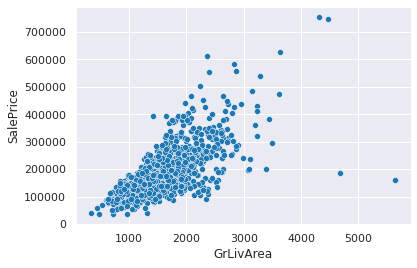

In [162]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train);

In [163]:
train[train['GrLivArea'] > 4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [164]:
train.drop(train[train['GrLivArea'] > 4500].index, inplace=True);
train.reset_index(inplace=True);

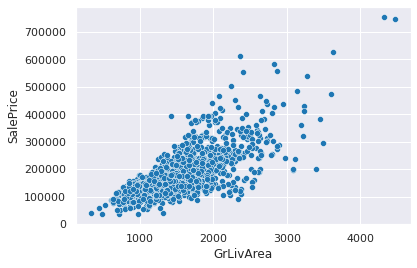

In [165]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train);

### Missing Values

In [166]:
all_data = pd.concat([train, test])

In [167]:
all_data.drop('Id', axis=1, inplace=True)

In [168]:
missing_values(all_data)

,Total,Percent
PoolQC,2908,199.45
MiscFeature,2812,192.87
Alley,2719,186.49
Fence,2346,160.91
SalePrice,1459,100.07
index,1459,100.07
FireplaceQu,1420,97.39
LotFrontage,486,33.33
GarageQual,159,10.91
GarageFinish,159,10.91


In [169]:
missing_val_col = ["Alley", "PoolQC", "MiscFeature","Fence","FireplaceQu","GarageType","GarageFinish",
                   "GarageQual", "GarageCond", 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'MasVnrType']

for col in missing_val_col:
    all_data[col].fillna('None', inplace=True)
    
missing_val_col2 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                    'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

for col in missing_val_col2:
    all_data[col].fillna(0, inplace=True)

In [170]:
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [171]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
#all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
#all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)

In [172]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [173]:
fill_with_mode_cols = ['Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Electrical', 'Exterior2nd',
                      'Exterior1st']
for col in fill_with_mode_cols:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [174]:
missing_values(all_data)

,Total,Percent
SalePrice,1459,100.07
index,1459,100.07


### Fixing Skewness

In [175]:
num_cols = all_data.dtypes[all_data.dtypes != 'object'].index

In [176]:
all_data[num_cols].skew().sort_values(ascending=False)

MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
MasVnrArea        2.623068
OpenPorchSF       2.530660
SalePrice         1.881296
WoodDeckSF        1.845741
1stFlrSF          1.257933
GrLivArea         1.069300
LotFrontage       1.059348
BsmtFinSF1        0.981149
BsmtUnfSF         0.920161
2ndFlrSF          0.861999
TotRmsAbvGrd      0.749618
Fireplaces        0.725651
HalfBath          0.697024
TotalBsmtSF       0.672097
BsmtFullBath      0.622735
BedroomAbvGr      0.326736
GarageArea        0.216968
MoSold            0.197447
FullBath          0.165599
YrSold            0.132064
index             0.000165
GarageCars       -0.219410
YearRemodAdd     -0.450365
YearBuilt        -0.599503
GarageYrBlt      -3.906642
dtype: float64

In [177]:
for col in num_cols:
    all_data[col] = np.log1p(all_data[col])
all_data[num_cols].skew().sort_values(ascending=False)

PoolArea         15.631314
3SsnPorch         8.826656
LowQualFinSF      8.559041
MiscVal           5.214687
BsmtHalfBath      3.775149
KitchenAbvGr      3.520694
ScreenPorch       2.946085
BsmtFinSF2        2.462526
EnclosedPorch     1.960960
HalfBath          0.582963
MasVnrArea        0.538731
BsmtFullBath      0.425573
2ndFlrSF          0.306786
Fireplaces        0.236180
WoodDeckSF        0.159605
YrSold            0.131252
SalePrice         0.121580
1stFlrSF          0.030374
TotRmsAbvGrd      0.028378
GrLivArea        -0.022062
OpenPorchSF      -0.041559
FullBath         -0.249772
YearRemodAdd     -0.457506
LotArea          -0.532920
BsmtFinSF1       -0.616808
YearBuilt        -0.625935
MoSold           -0.873808
BedroomAbvGr     -0.982822
LotFrontage      -1.084460
GarageCars       -1.276000
index            -1.883131
BsmtUnfSF        -2.155250
GarageArea       -3.512426
GarageYrBlt      -3.926404
TotalBsmtSF      -4.966774
dtype: float64

### Feature Engineering

In [178]:
# New feature TotalSF
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
# New feature YrBltAndRemod
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']
# New feature Total_Bathrooms
all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath'])
                              )
# New feature Total_porch_sf
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF']
                             )

In [179]:
# New hasX features
all_data['hasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [180]:
all_data.shape

(2917, 90)

In [181]:
# Dummy Variables
final_data = pd.get_dummies(all_data).reset_index(drop=True)
final_data.shape

(2917, 344)

In [318]:
X = final_data.iloc[:len(train), :]
y = X['SalePrice'].copy()
X.drop(['SalePrice', 'index'], axis=1, inplace=True)
X.shape, y.shape

((1458, 342), (1458,))

In [319]:
X_test = final_data.iloc[len(train):, :].drop(['SalePrice', 'index'], axis=1)
X_test.shape

(1459, 342)

## 5. Model building

In [356]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [321]:
def cv_rmse(model, X=X, y=y, cv=10):
    """ Perform cross validation and get RMSE """
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return np.sqrt(-scores.mean())

### Ridge regression

In [322]:
a = 2
ridge = Ridge(alpha=a)
cv_rmse(ridge)

0.1152866792716033

### Lasso

In [323]:
a = 0.001
lasso = Lasso(alpha=a)
cv_rmse(lasso)

0.1177147660837792

### Elastic Net

In [324]:
a = 0.001
net = ElasticNet(alpha=a)
cv_rmse(net)

0.11439942757988161

### Gradient Boosting Regressor

In [325]:
gbr = GradientBoostingRegressor()
cv_rmse(gbr)

0.12470800090443893

### XGBoost

In [326]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [327]:
xg_reg = xgb.XGBRegressor()

In [351]:
cv_rmse(my_XGB_model)

0.12091787852265821

In [357]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

CPU times: user 2min 34s, sys: 371 µs, total: 2min 34s
Wall time: 2min 34s


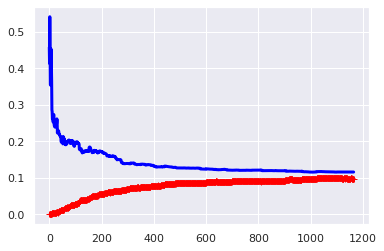

In [360]:
%%time
plot_learning_curves(net, X, y)

## 6. Fine-tune the model

In [330]:
from sklearn.model_selection import GridSearchCV

In [331]:
params = {
    'alpha':[-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
}

grid = GridSearchCV(net, params, cv=10,
                    scoring='neg_mean_squared_error',
                    n_jobs=7, verbose=1)
grid.fit(X, y)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   11.9s
[Parallel(n_jobs=7)]: Done 210 out of 210 | elapsed:   27.4s finished


GridSearchCV(cv=10, estimator=ElasticNet(alpha=0.001), n_jobs=7,
             param_grid={'alpha': [-3, -2, -1, 1e-15, 1e-10, 1e-08, 1e-05,
                                   0.0001, 0.001, 0.01, 0.5, 1, 1.5, 2, 3, 4, 5,
                                   10, 20, 30, 40]},
             scoring='neg_mean_squared_error', verbose=1)

In [332]:
np.sqrt(-grid.best_score_), grid.best_params_

(0.11439942757988161, {'alpha': 0.001})

In [333]:
final_model = grid.best_estimator_

## 7. Submit results

In [335]:
y_pred = final_model.predict(X_test)

In [339]:
final_prediction = np.exp(y_pred)

In [344]:
submission = pd.read_csv('data/sample_submission.csv')

In [346]:
submission['SalePrice'] = final_prediction

In [347]:
submission.head()

,Id,SalePrice
0,1461,120661.178610
1,1462,154688.563556
2,1463,186399.684701
3,1464,193396.943230
4,1465,200576.259571


In [348]:
submission.to_csv('submission.csv', index=False)